In [65]:
import random as rnd
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from random import randint
from matplotlib.colors import ListedColormap
import pylab as pl
%matplotlib inline

In [66]:
datosX = []
datosY=[]
for x in range(0, 200):
    datosAux = []
    x1=randint(-25, 25)
    x2=randint(-25, 25)
    datosAux.append(x1)
    datosAux.append(x2)
    datosX.append(datosAux)
    if (x1+12.5)**2 + (x2-12.5)**2 < 100:
        #print ((x1-0)**2 + (x2-0)**2)
        y=1
    elif (x1-12.5)**2 + (x2-12.5)**2 < 100:
        #print (x1-5)**2 + (x2-5)**2
        y=2
    elif (x1-12.5)**2 + (x2+12.5)**2 < 100:
        #print (x1-2)**2 + (x2+3)**2
        y=3
    elif (x1+12.5)**2 + (x2+12.5)**2 < 100:
        #print (x1+9)**2 + (x2-2)**2
        y=4
    else:
        y=0
    datosY.append(y)

datosX=np.asarray(datosX)
datosY=np.asarray(datosY)

In [67]:
#Si escalamos los datos
scaleX = StandardScaler()
scaleX.fit(datosX)
datosX=scaleX.transform(datosX)

In [68]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(datosX, datosY) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [69]:
h = .02  # step size in the mesh

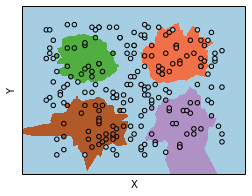

In [70]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = datosX[:,0].min() - .5, datosX[:,0].max() + .5
y_min, y_max = datosX[:,1].min() - .5, datosX[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(datosX[:,0], datosX[:,1],c=datosY )
pl.xlabel('X')
pl.ylabel('Y')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

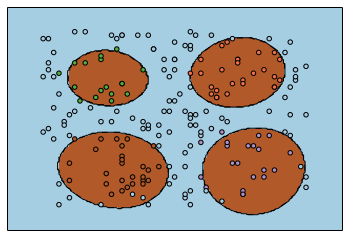

In [71]:
clf = SVC(kernel='rbf', C=1)
clf.fit(datosX, datosY)

clf.support_vectors_

fignum = 1
# get the separating hyperplane
plt.clf()

#plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
plt.scatter(datosX[:, 0], datosX[:, 1], c=datosY, zorder=10, cmap=plt.cm.Paired, edgecolors='k')

plt.axis('tight')

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z1 = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z1 = Z1.reshape(xx.shape)
plt.figure(fignum, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z1 > 0, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z1, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()